<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/D_Aasritha_Reddy/iris_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print(df_iris.info())
print("----------------------------------------------------------")
print(df_iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
----------------------------------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000       

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#using iqr
def detect(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        #defining outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #filtering
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = outliers_in_column

    return outliers

In [ ]:
# calling function
outliers_dict= detect(df_iris)
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:\n{outliers}\n")

Outliers in sepal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []

Outliers in sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0

Outliers in petal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []

Outliers in petal width (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []



In [ ]:
import plotly.express as px
from scipy import stats
import numpy as np

In [ ]:
numeric_cols = df_iris.columns[:]
print(numeric_cols)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [ ]:
z_scores = np.abs(stats.zscore(df_iris[numeric_cols]))
threshold = 3
outliers_z = z_scores > threshold
outliers_z_df = df_iris[outliers_z.any(axis=1)]
print("Outliers using Z-score:")
print(outliers_z_df)

Outliers using Z-score:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4


In [ ]:
z_scores = np.abs(stats.zscore(df_iris[numeric_cols]))
threshold = 2.5
outliers_z = z_scores > threshold
outliers_z_df = df_iris[outliers_z.any(axis=1)]
print("Outliers using Z-score:")
print(outliers_z_df)

Outliers using Z-score:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
33                5.5               4.2                1.4               0.2


In [ ]:
z_scores = np.abs(stats.zscore(df_iris[numeric_cols]))
threshold = 2.3
outliers_z = z_scores > threshold
outliers_z_df = df_iris[outliers_z.any(axis=1)]
print("Outliers using Z-score:")
print(outliers_z_df)

Outliers using Z-score:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                 5.7               4.4                1.5               0.4
32                 5.2               4.1                1.5               0.1
33                 5.5               4.2                1.4               0.2
60                 5.0               2.0                3.5               1.0
131                7.9               3.8                6.4               2.0


In [ ]:
fig = px.box(df_iris, y=numeric_cols, title="Boxplot of Iris Features")
fig.show()

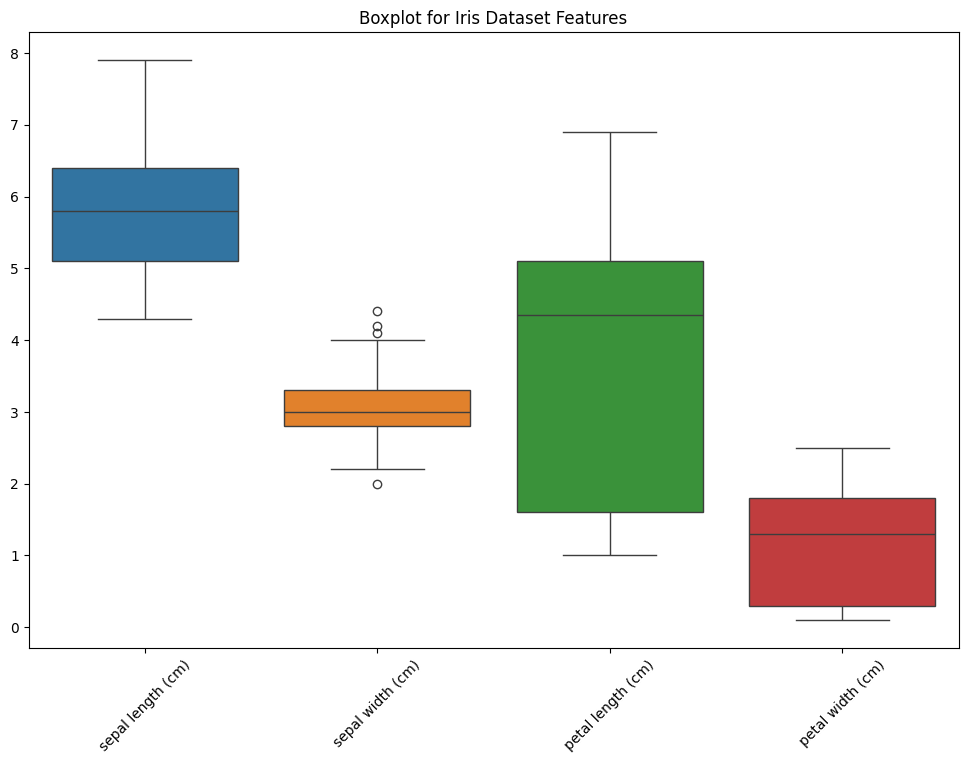

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_iris)
plt.title('Boxplot for Iris Dataset Features')
plt.xticks(rotation=45)
plt.show()
#detected outlier using boxplot

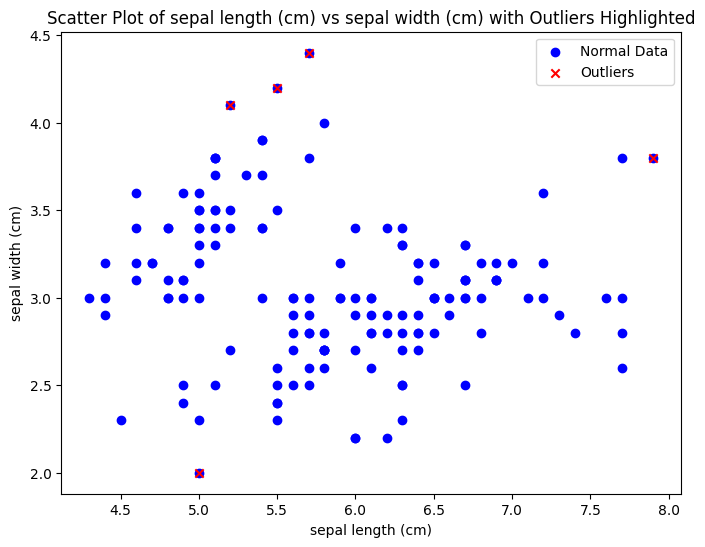

In [ ]:
x_feature = 'sepal length (cm)'
y_feature = 'sepal width (cm)'
plt.figure(figsize=(8, 6))
plt.scatter(df_iris[x_feature], df_iris[y_feature], label="Normal Data", color='blue')
plt.scatter(outliers_z_df[x_feature], outliers_z_df[y_feature], label="Outliers", color='red', marker='x')
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with Outliers Highlighted')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.show()

In [ ]:
df=pd.read_csv("/content/store_df.csv")
df.head()

,Product_Category,Store_Type,Product_Quality,Shelf_Placement,Discount_Level,Sales_Amount
0,Beverage,Urban,High,Top,Medium,500
1,Snack,Suburban,Medium,Middle,Low,300
2,Fruit,Rural,High,Bottom,NaN,150
3,Dairy,Urban,Low,Middle,High,450
4,Bakery,Suburban,Medium,Top,Low,350


In [ ]:
data_encoded=pd.get_dummies(df,columns=["Store_Type","Product_Category"])
data_encoded

,Product_Quality,Shelf_Placement,Discount_Level,Sales_Amount,Store_Type_Rural,Store_Type_Suburban,Store_Type_Urban,Product_Category_Bakery,Product_Category_Beverage,Product_Category_Canned Goods,Product_Category_Dairy,Product_Category_Frozen Food,Product_Category_Fruit,Product_Category_Meat,Product_Category_Seafood,Product_Category_Snack,Product_Category_Vegetable
0,High,Top,Medium,500,False,False,True,False,True,False,False,False,False,False,False,False,False
1,Medium,Middle,Low,300,False,True,False,False,False,False,False,False,False,False,False,True,False
2,High,Bottom,NaN,150,True,False,False,False,False,False,False,False,True,False,False,False,False
3,Low,Middle,High,450,False,False,True,False,False,False,True,False,False,False,False,False,False
4,Medium,Top,Low,350,False,True,False,True,False,False,False,False,False,False,False,False,False
5,High,Bottom,NaN,200,True,False,False,False,False,False,False,False,False,False,False,False,True
6,Medium,Middle,Medium,400,False,False,True,False,True,False,False,False,False,False,False,False,False
7,High,Top,High,550,False,True,False,False,False,False,False,False,False,False,False,True,False
8,Low,Bottom,NaN,100,True,False,False,False,False,False,False,False,True,False,False,False,False
9,Medium,Middle,Low,300,False,False,True,False,False,False,True,False,False,False,False,False,False


In [ ]:
df["Store_Type"].value_counts()

,count
Store_Type,
Urban,14
Suburban,13
Rural,13


In [ ]:
df["Store_Type"][0]

'Urban'